# Unit 1

In [1]:
import pandas as pd
df = pd.read_csv(r"Set 6-house_price_prediction.csv")

In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,NaN,2012.917,NaN,84.87882,10.0,NaN,121.54024,37.9
1,2.0,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3.0,NaN,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,NaN,NaN,13.3,561.98450,NaN,24.98746,121.54391,54.8
4,5.0,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1


## Classification of dataset features
- Transaction Date - Interval
- House Age - Ratio
- Distance to nearest MRT station - Ratio
- Number of convenience stores - Ratio
- Latitude, Longitude - Interval
- House price of unit area - Ratio

In [3]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,354.000000,355.000000,356.000000,356.000000,353.000000,356.000000,356.000000,355.000000
mean,209.522599,2013.142741,17.937640,1085.149666,4.033994,24.968968,121.533441,38.271831
std,120.443025,0.280612,11.393877,1278.004333,2.905516,0.011948,0.015197,13.754970
min,2.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,102.250000,2012.917000,9.850000,289.324800,1.000000,24.963050,121.529805,27.900000
50%,209.500000,2013.167000,16.200000,492.231300,4.000000,24.971100,121.538525,38.800000
75%,315.750000,2013.417000,28.250000,1440.755750,6.000000,24.977440,121.543105,46.900000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.001150,121.566270,117.500000


In [4]:
df.isnull().sum()

No                                        60
X1 transaction date                       59
X2 house age                              58
X3 distance to the nearest MRT station    58
X4 number of convenience stores           61
X5 latitude                               58
X6 longitude                              58
Y house price of unit area                59
dtype: int64

In [5]:
description = df[["Y house price of unit area", "X3 distance to the nearest MRT station"]].describe()
y_range = df["Y house price of unit area"].max() - df["Y house price of unit area"].min()
x3_range = df["X3 distance to the nearest MRT station"].max() - df["X3 distance to the nearest MRT station"].min()

ranges = pd.DataFrame({
    "Y house price of unit area": [y_range],
    "X3 distance to the nearest MRT station": [x3_range]
}, index=["range"])

merged_description = pd.concat([description, ranges])
merged_description

,Y house price of unit area,X3 distance to the nearest MRT station
count,355.000000,356.000000
mean,38.271831,1085.149666
std,13.754970,1278.004333
min,7.600000,23.382840
25%,27.900000,289.324800
50%,38.800000,492.231300
75%,46.900000,1440.755750
max,117.500000,6488.021000
range,109.900000,6464.638160


In [6]:
try:
    df = df.drop(columns=["No"]) # Because pandas already has indexing
except:
    pass

df.fillna({
    "X1 transaction date": df["X1 transaction date"].median(),
    "X2 house age": df["X2 house age"].median(),
    "X3 distance to the nearest MRT station": df["X3 distance to the nearest MRT station"].median(),
    "X4 number of convenience stores": df["X4 number of convenience stores"].median(),
    "Y house price of unit area": df["Y house price of unit area"].median()
}, inplace=True)

df.dropna(subset=["X5 latitude", "X6 longitude"], inplace=True)

df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013.167,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013.167,13.3,561.98450,4.0,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
6,2012.667,34.5,623.47310,7.0,24.97933,121.53642,40.3
...,...,...,...,...,...,...,...
408,2013.167,18.5,2175.74400,3.0,24.96330,121.51243,28.1
409,2013.167,13.7,4082.01500,0.0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,4.0,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6


In [7]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

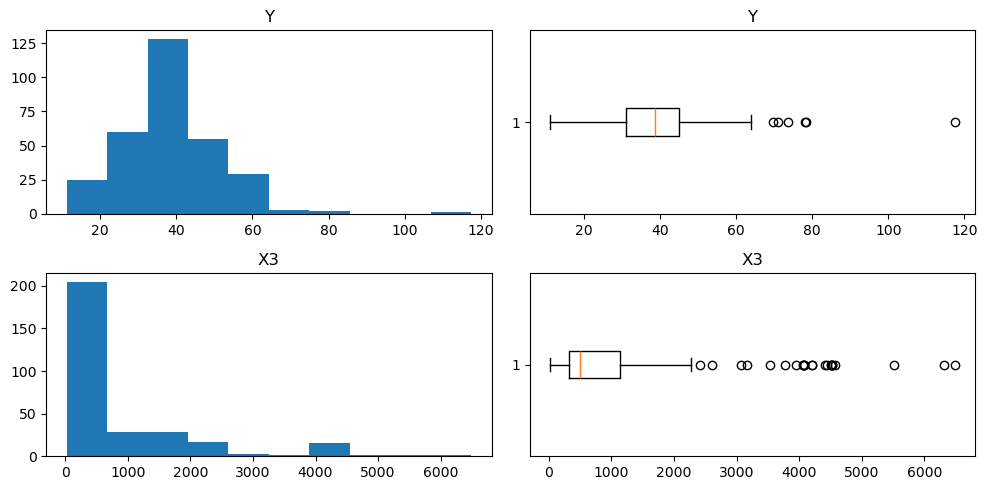

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].hist(df["Y house price of unit area"])
ax[0, 0].set_title("Y")

ax[0, 1].boxplot(df["Y house price of unit area"], orientation="horizontal")
ax[0, 1].set_title("Y")

ax[1, 0].hist(df["X3 distance to the nearest MRT station"])
ax[1, 0].set_title("X3")

ax[1, 1].boxplot(df["X3 distance to the nearest MRT station"], orientation="horizontal")
ax[1, 1].set_title("X3")

plt.tight_layout()
plt.show()

## Distribution Analysis
Both Y and X3 are right-skewed and have many outliers which need to be trimmed

In [9]:
# Remove outliers (only right side)
Q1 = df["Y house price of unit area"].quantile(0.25)
Q3 = df["Y house price of unit area"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df.drop(df[df["Y house price of unit area"] > upper_limit].index, inplace=True)

Q1 = df["X3 distance to the nearest MRT station"].quantile(0.25)
Q3 = df["X3 distance to the nearest MRT station"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df.drop(df[df["X3 distance to the nearest MRT station"] > upper_limit].index, inplace=True)

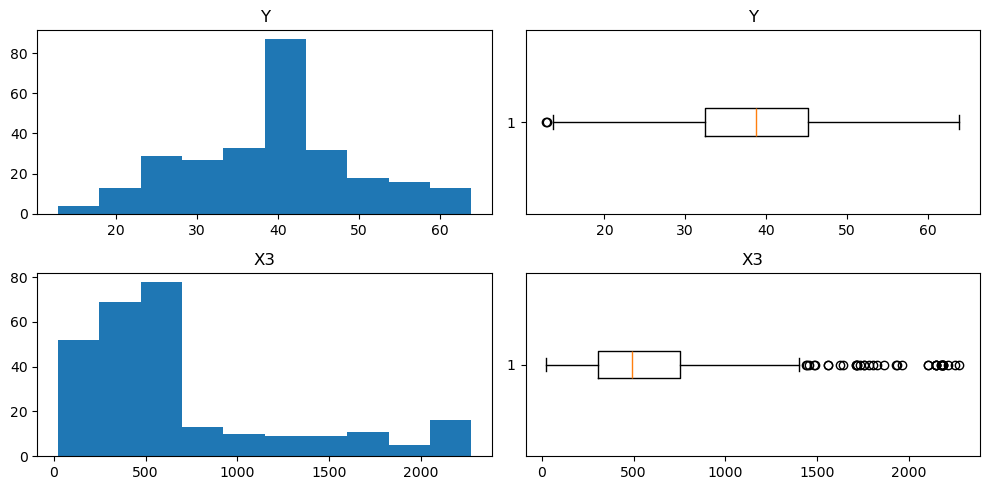

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].hist(df["Y house price of unit area"])
ax[0, 0].set_title("Y")

ax[0, 1].boxplot(df["Y house price of unit area"], orientation="horizontal")
ax[0, 1].set_title("Y")

ax[1, 0].hist(df["X3 distance to the nearest MRT station"])
ax[1, 0].set_title("X3")

ax[1, 1].boxplot(df["X3 distance to the nearest MRT station"], orientation="horizontal")
ax[1, 1].set_title("X3")

plt.tight_layout()
plt.show()

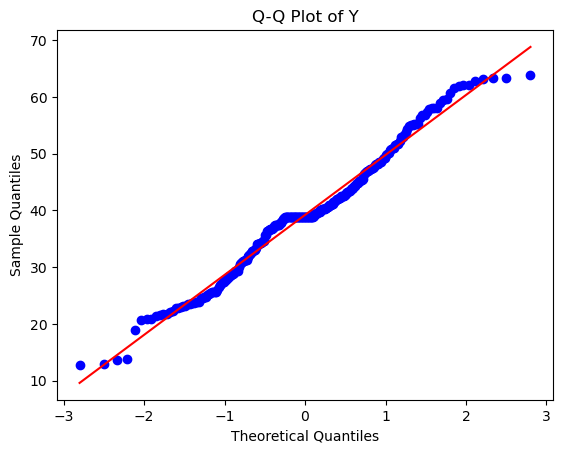

In [11]:
import scipy.stats as stats

stats.probplot(df["Y house price of unit area"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Y")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

## Pearson Correlation

In [12]:
cols = [
    "Y house price of unit area",
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    "X5 latitude",
    "X6 longitude"
]

# Compute correlation matrix
corr_matrix = df[cols].corr(method="pearson")

# Display correlation values with Y
corr_with_Y = corr_matrix["Y house price of unit area"].sort_values(ascending=False)
print(corr_with_Y)

Y house price of unit area                1.000000
X4 number of convenience stores           0.459325
X6 longitude                              0.419370
X5 latitude                               0.408366
X2 house age                             -0.203437
X3 distance to the nearest MRT station   -0.595727
Name: Y house price of unit area, dtype: float64


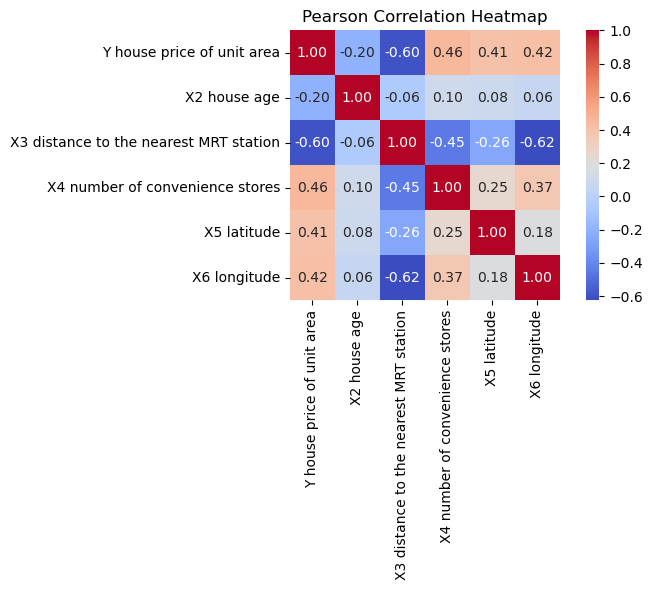

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.show()

## Heatmap Analysis
- Distance to MRT and house price per unit area have negative correlation as houses closer to MRT are valued higher
- Number of convenience stores and house price are positively correlated as more convenience stores nearby increase house value
- House age has negative correlation with house price as older houses tend to be valued lower